#**Wind Turbine Scada Performance Analysis**



**Task 1 — EDA**

Dataset shape: (13597, 5)

Missing values per column:
Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64


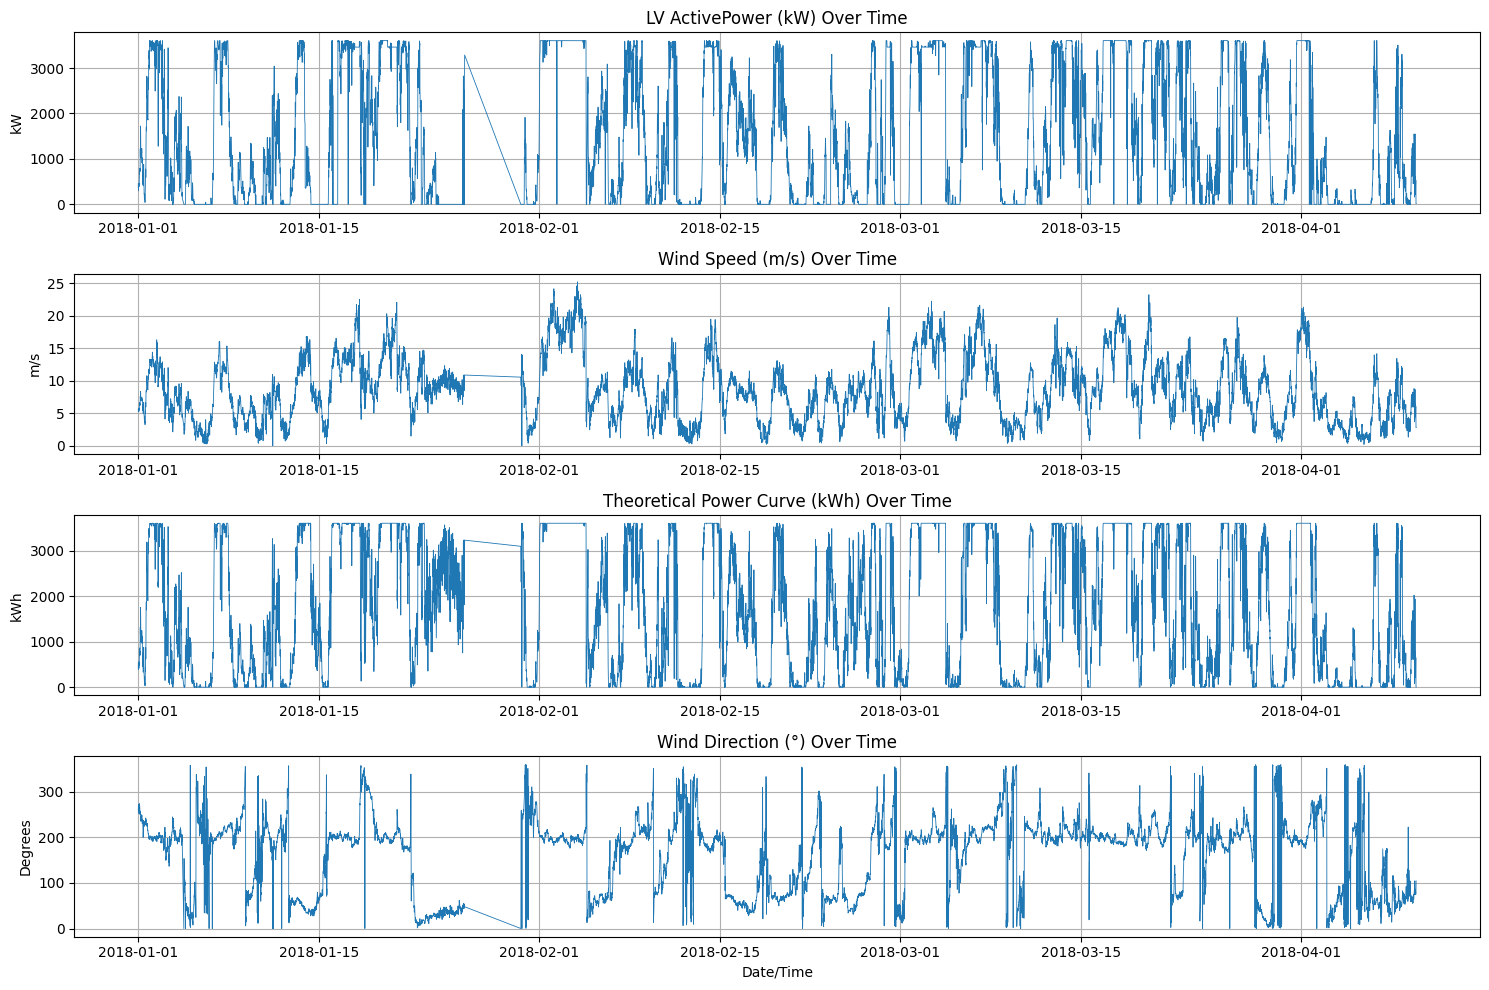

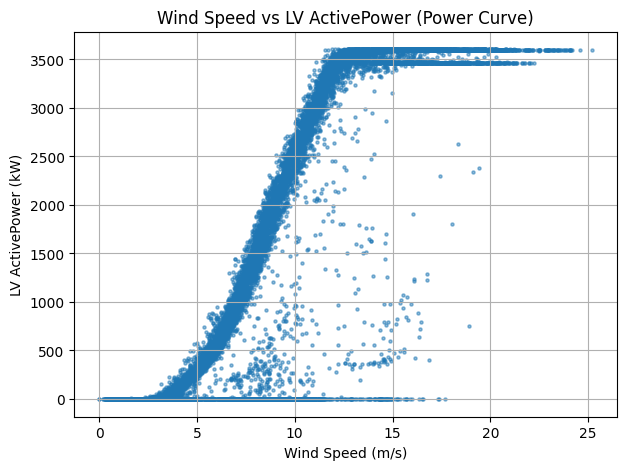


📌 Task 1 completed: time-series trends plotted + power curve scatterplot generated.


In [1]:


import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/content/T1.csv")


df['Date/Time'] = pd.to_datetime(df['Date/Time'], dayfirst=True)
df = df.sort_values('Date/Time')


print("Dataset shape:", df.shape)
print("\nMissing values per column:")
print(df.isna().sum())

plt.figure(figsize=(15,10))


plt.subplot(4,1,1)
plt.plot(df['Date/Time'], df['LV ActivePower (kW)'], linewidth=0.6)
plt.title("LV ActivePower (kW) Over Time")
plt.ylabel("kW")
plt.grid(True)


plt.subplot(4,1,2)
plt.plot(df['Date/Time'], df['Wind Speed (m/s)'], linewidth=0.6)
plt.title("Wind Speed (m/s) Over Time")
plt.ylabel("m/s")
plt.grid(True)


plt.subplot(4,1,3)
plt.plot(df['Date/Time'], df['Theoretical_Power_Curve (KWh)'], linewidth=0.6)
plt.title("Theoretical Power Curve (kWh) Over Time")
plt.ylabel("kWh")
plt.grid(True)


plt.subplot(4,1,4)
plt.plot(df['Date/Time'], df['Wind Direction (°)'], linewidth=0.6)
plt.title("Wind Direction (°) Over Time")
plt.xlabel("Date/Time")
plt.ylabel("Degrees")
plt.grid(True)

plt.tight_layout()
plt.show()


plt.figure(figsize=(7,5))
plt.scatter(df['Wind Speed (m/s)'], df['LV ActivePower (kW)'], s=5, alpha=0.5)
plt.title("Wind Speed vs LV ActivePower (Power Curve)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("LV ActivePower (kW)")
plt.grid(True)
plt.show()

print("\n📌 Task 1 completed: time-series trends plotted + power curve scatterplot generated.")


**Task 2 — Supervised Learning (Time-Series Forecasting for ALL 4 Variables)**

Dataset shape: (13597, 5)
X shape (samples, features): (13585, 48)
y shape (samples, targets): (13585, 4)

📌 Time-Series Forecasting Performance (Next-Step for All 4 Variables)

LV ActivePower (kW):
  MAE  : 160.2041
  RMSE : 313.5154

Wind Speed (m/s):
  MAE  : 0.6414
  RMSE : 0.8777

Theoretical_Power_Curve (KWh):
  MAE  : 165.4219
  RMSE : 296.5661

Wind Direction (°):
  MAE  : 31.3813
  RMSE : 53.3436



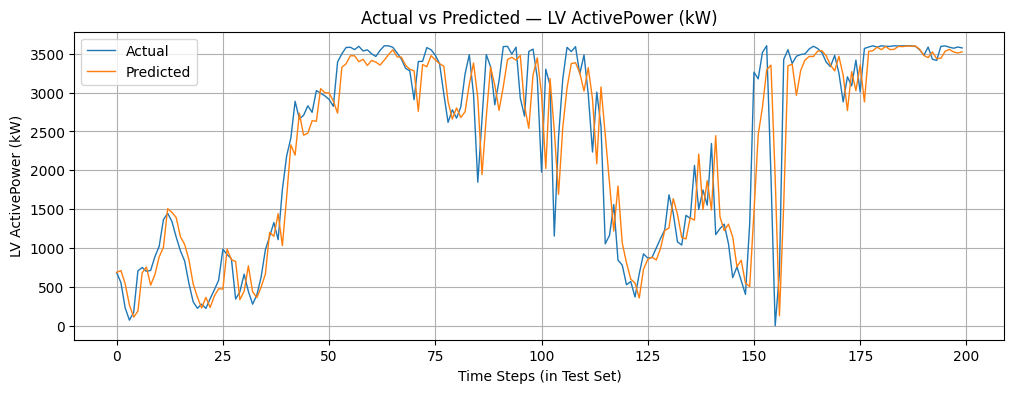

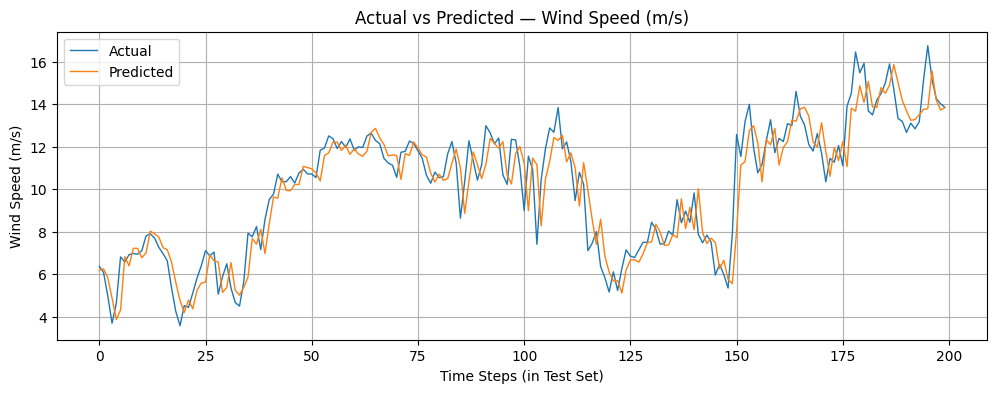

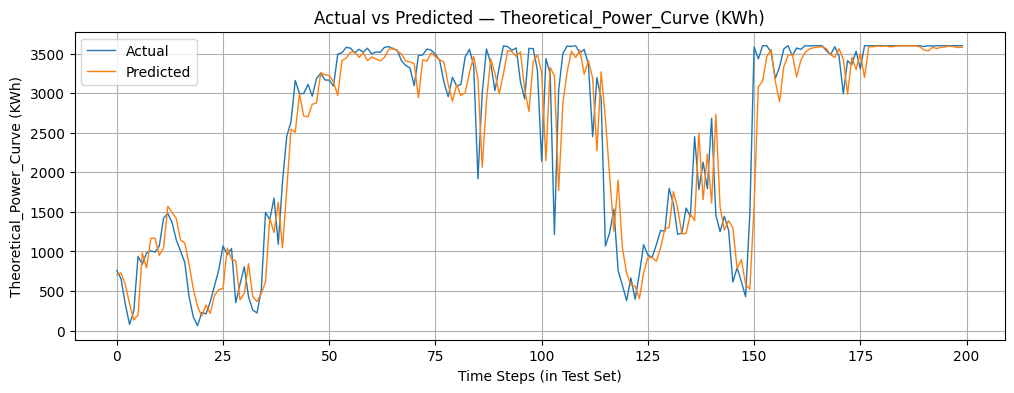

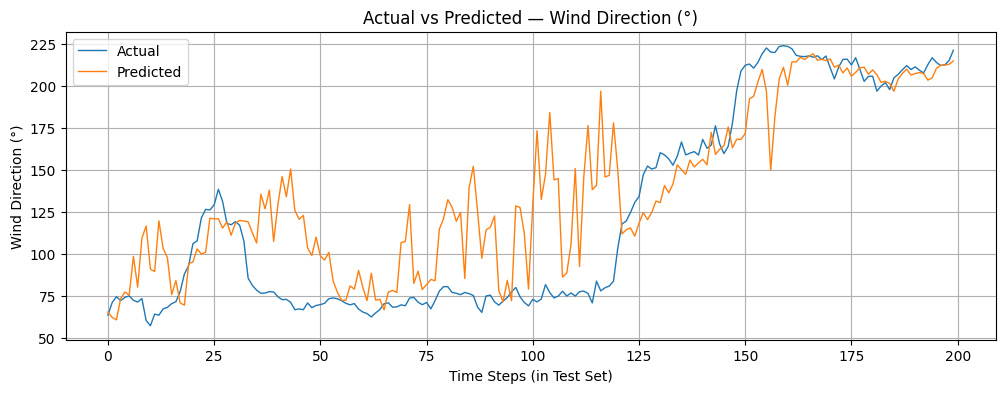


✅ Task 2 completed: windowed data prepared, multi-output model trained, metrics calculated, and plots generated.


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



df = pd.read_csv("/content/T1.csv")


df['Date/Time'] = pd.to_datetime(df['Date/Time'], dayfirst=True)
df = df.sort_values('Date/Time').reset_index(drop=True)

print("Dataset shape:", df.shape)


target_cols = [
    'LV ActivePower (kW)',
    'Wind Speed (m/s)',
    'Theoretical_Power_Curve (KWh)',
    'Wind Direction (°)'
]

data = df[target_cols].values



window_size = 12

X, y = [], []
for i in range(window_size, len(data)):

    X.append(data[i-window_size:i].flatten())

    y.append(data[i])

X = np.array(X)
y = np.array(y)

print("X shape (samples, features):", X.shape)
print("y shape (samples, targets):", y.shape)



split_index = int(len(X) * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)



print("\n📌 Time-Series Forecasting Performance (Next-Step for All 4 Variables)\n")

for i, col in enumerate(target_cols):
    mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i]))
    print(f"{col}:")
    print(f"  MAE  : {mae:.4f}")
    print(f"  RMSE : {rmse:.4f}\n")



steps_to_plot = 200

for i, col in enumerate(target_cols):
    plt.figure(figsize=(12,4))
    plt.plot(y_test[:steps_to_plot, i], label="Actual", linewidth=1)
    plt.plot(y_pred[:steps_to_plot, i], label="Predicted", linewidth=1)
    plt.title(f"Actual vs Predicted — {col}")
    plt.xlabel("Time Steps (in Test Set)")
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n✅ Task 2 completed: windowed data prepared, multi-output model trained, metrics calculated, and plots generated.")

**Task 3 — Unsupervised Learning**

/tmp/ipython-input-2141577078.py:16: RuntimeWarning: divide by zero encountered in divide
  ratio = actual / theoretical
/tmp/ipython-input-2141577078.py:16: RuntimeWarning: invalid value encountered in divide
  ratio = actual / theoretical



🔍 Anomaly Detection Summary
Total rows : 50530
Anomalies  : 394

📌 Sample Underperforming Entries:
               Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
384  2018-01-03 16:00:00            -0.393068          2.185888   
794  2018-01-06 15:50:00            -0.456533          2.949518   
1199 2018-01-09 11:20:00             1.076666          3.748315   
1402 2018-01-10 21:10:00            -0.038067          3.248698   
1584 2018-01-12 03:40:00            -0.331467          2.574092   

      Theoretical_Power_Curve (KWh)  Wind Direction (°)  Performance_Ratio  \
384                        0.000000          238.410294               -inf   
794                        0.000000          204.901093               -inf   
1199                      84.744122           78.581161           0.012705   
1402                      28.906391          279.040100          -0.001317   
1584                       0.000000          214.811203               -inf   

      Anomaly  
384         

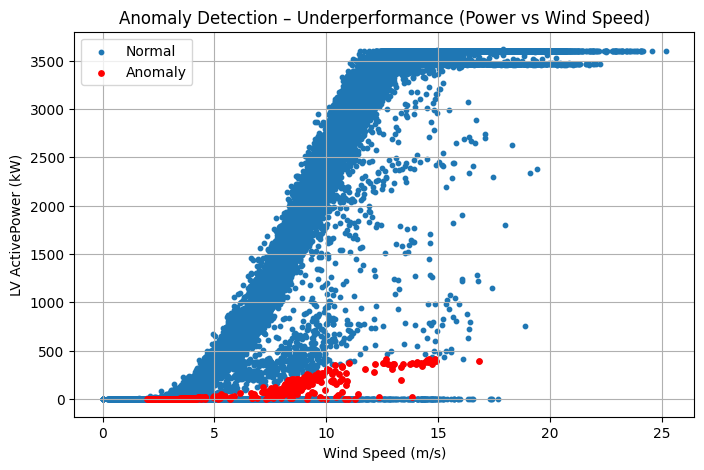


 Task 3 completed: anomalies detected, marked, and visualized.


In [3]:


import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


df = pd.read_csv("/content/T1.csv")
df['Date/Time'] = pd.to_datetime(df['Date/Time'], dayfirst=True)
df = df.sort_values('Date/Time')


actual = df['LV ActivePower (kW)'].values
theoretical = df['Theoretical_Power_Curve (KWh)'].values


ratio = actual / theoretical
df['Performance_Ratio'] = ratio


iso = IsolationForest(contamination=0.02, random_state=42)
df['Anomaly'] = iso.fit_predict(ratio.reshape(-1, 1))


df['Anomaly'] = df['Anomaly'].apply(lambda x: 1 if x == -1 else 0)


print("\n🔍 Anomaly Detection Summary")
print("Total rows :", len(df))
print("Anomalies  :", df['Anomaly'].sum())


print("\n📌 Sample Underperforming Entries:")
print(df[df['Anomaly'] == 1].head())


plt.figure(figsize=(8,5))
plt.scatter(df['Wind Speed (m/s)'], df['LV ActivePower (kW)'], s=10, label="Normal")
plt.scatter(df.loc[df['Anomaly']==1, 'Wind Speed (m/s)'],
            df.loc[df['Anomaly']==1, 'LV ActivePower (kW)'],
            s=15, color='red', label="Anomaly")
plt.title("Anomaly Detection – Underperformance (Power vs Wind Speed)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("LV ActivePower (kW)")
plt.legend()
plt.grid(True)
plt.show()

print("\n Task 3 completed: anomalies detected, marked, and visualized.")


**Task 4 — AI Task (Simple Rule-Based AI)**

In [4]:
# ===== TASK 4 — AI Turbine Performance Score Generator =====

import pandas as pd
import numpy as np


df = pd.read_csv("/content/T1.csv")
df['Date/Time'] = pd.to_datetime(df['Date/Time'], dayfirst=True)
df = df.sort_values('Date/Time').reset_index(drop=True)


actual = df['LV ActivePower (kW)']
theoretical = df['Theoretical_Power_Curve (KWh)']


df['Performance_Score'] = np.where(
    theoretical > 0,
    (actual / theoretical) * 100,
    np.nan
)

df['Performance_Score'] = df['Performance_Score'].clip(lower=0, upper=100)


def categorize_state(score):
    if pd.isna(score):
        return "Unknown"
    elif score >= 80:
        return "Good"
    elif score >= 50:
        return "Moderate"
    else:
        return "Poor"

df['Turbine_State'] = df['Performance_Score'].apply(categorize_state)


def generate_suggestion(state):
    if state == "Good":
        return "Turbine is operating efficiently. Maintain regular monitoring."
    elif state == "Moderate":
        return "Slight performance drop detected. Schedule a routine inspection to check for minor issues."
    elif state == "Poor":
        return "Significant underperformance detected. Inspect blades, yaw alignment, and drivetrain urgently."
    else:
        return "Insufficient data to evaluate turbine performance at this timestamp."

df['Suggestion'] = df['Turbine_State'].apply(generate_suggestion)


print("📌 Turbine State Distribution:")
print(df['Turbine_State'].value_counts())

example = df.iloc[-1]
print("\n📌 Example AI Turbine Performance Output:")
print(f"Date/Time         : {example['Date/Time']}")
print(f"LV ActivePower    : {example['LV ActivePower (kW)']:.2f} kW")
print(f"Theoretical Power : {example['Theoretical_Power_Curve (KWh)']:.2f} kWh")
print(f"Performance Score : {example['Performance_Score']:.2f} / 100")
print(f"Turbine State     : {example['Turbine_State']}")
print(f"Suggestion        : {example['Suggestion']}")

print("\n Task 4 completed: score calculated, state categorized, and suggestion generated.")



📌 Turbine State Distribution:
Turbine_State
Good        31606
Unknown      7749
Moderate     6103
Poor         5072
Name: count, dtype: int64

📌 Example AI Turbine Performance Output:
Date/Time         : 2018-12-31 23:50:00
LV ActivePower    : 2820.47 kW
Theoretical Power : 2779.18 kWh
Performance Score : 100.00 / 100
Turbine State     : Good
Suggestion        : Turbine is operating efficiently. Maintain regular monitoring.

 Task 4 completed: score calculated, state categorized, and suggestion generated.
